In [1]:

import tensorflow as tf

class TSModel:
    def __init__(self, N_steps, N_features, lr):
        self.N_steps = N_steps
        self.N_features = N_features
        self.lr = lr

    def get_model(self):
        layer_input = tf.keras.layers.Input(
            shape=(self.N_steps, self.N_features)
        )
        layer_gru,_,_ = tf.keras.layers.Bidirectional(
            tf.keras.layers.GRU(
                units=8, 
                return_sequences=True,
                return_state=True
            )
        )(layer_input)
        layer_flatten = tf.keras.layers.Flatten()(layer_gru)
        layer_dropout1 = tf.keras.layers.Dropout(0.3)(layer_flatten)
        layer_dense_output_time = tf.keras.layers.Dense(1, activation="relu")(
            layer_dropout1)
        layer_dense_output_xy = tf.keras.layers.Dense(2, activation=None)(
            layer_dropout1)
        output = tf.keras.layers.Concatenate()(
            [layer_dense_output_time, layer_dense_output_xy])
        
        model = tf.keras.Model(inputs=layer_input, outputs=output)
        optimizer = tf.keras.optimizers.Adam(learning_rate=self.lr)
        loss = tf.keras.losses.mean_squared_error
        model.compile(optimizer=optimizer,loss=loss)
        return model
        
    
    
    


In [2]:
c = TSModel(N_steps=10, N_features=5, lr=0.01)
model = c.get_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 10, 5)]      0                                            
__________________________________________________________________________________________________
bidirectional (Bidirectional)   [(None, 10, 16), (No 720         input_1[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 160)          0           bidirectional[0][0]              
__________________________________________________________________________________________________
dropout (Dropout)               (None, 160)          0           flatten[0][0]                    
______________________________________________________________________________________________

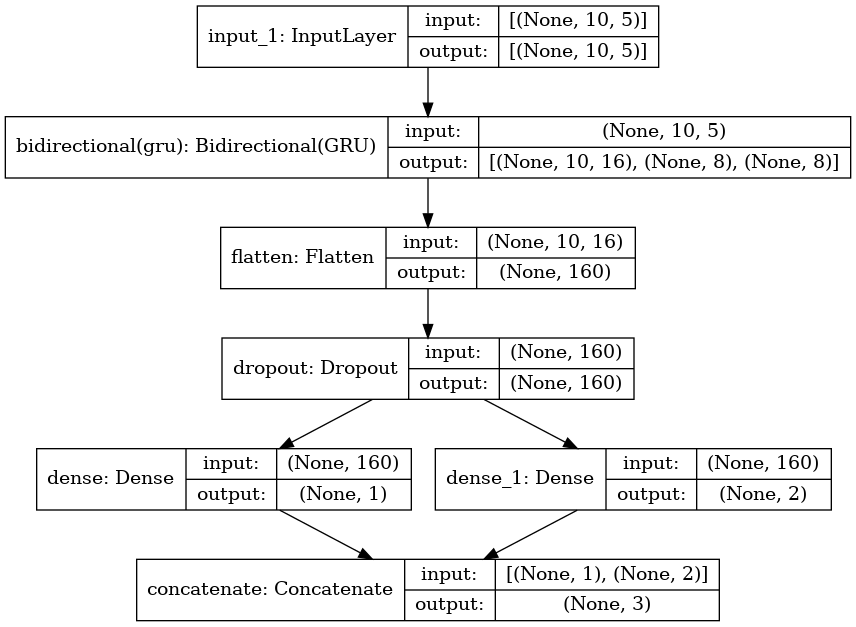

In [5]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

In [11]:
model.input

<KerasTensor: shape=(None, 10, 5) dtype=float32 (created by layer 'input_1')>

In [12]:
model.output

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'concatenate')>